In [30]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from madaline import MADALINE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:

# Load the dataset
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# List of columns to remove
columns_to_remove = ['number of reviews','Title','Clothing ID', 'Age', 'Division Name', 'Department Name', 'Class Name']

# Drop the specified columns
data.drop(columns_to_remove, axis=1, inplace=True)


In [32]:

# Preprocessing the Review Text column
def preprocess_text(text):
    # Check if text is a string
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]

        stemmer = SnowballStemmer(language='english')  # Initialize Snowball stemmer
        stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]  # Stem tokens

        # Join tokens back into text
        processed_text = ' '.join(stemmed_tokens)
        return processed_text
    else:
        return ""  # Return an empty string if text is not a string

# Apply preprocessing to the Review Text column
data['Review Text'] = data['Review Text'].apply(preprocess_text)

# Define features (X) and target (y)
X = data['Review Text']
y = data['Rating'].apply(lambda x: 1 if x > 3 else 0)  # Convert ratings to binary sentiment labels


In [33]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # You can adjust the max_features parameter as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [34]:


# Train a logistic regression model
logistic_model = LogisticRegression(C=1)
logistic_model.fit(X_train_tfidf, y_train)


LogisticRegression(C=1)

In [35]:
# Train a Stochastic Gradient Descent (SGD) model
sgd_model = SGDClassifier()
sgd_model.fit(X_train_tfidf, y_train)


SGDClassifier()

In [36]:
# Train a Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

SVC()

In [37]:
# Train a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [38]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [39]:
# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Train a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(random_state=42)

In [41]:
# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [42]:
# Train a perceptron model
perceptron_model = Perceptron()
perceptron_model.fit(X_train_tfidf, y_train)

Perceptron()

In [43]:
# Initialize and train the MLP feedforward model with SGD solver
mlp_feedforward_model = MLPClassifier(hidden_layer_sizes=(200,100,50), max_iter=1000, solver='sgd',activation='relu', random_state=42)
mlp_feedforward_model.fit(X_train_tfidf, y_train)

In [ ]:
# Train an MLP with backpropagation
mlp_backpropagation_model = MLPClassifier(hidden_layer_sizes=(200,100,50), max_iter=1000)
mlp_backpropagation_model.fit(X_train_tfidf, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=100)

In [ ]:
# Train an Adaline model
adaline_model = SGDClassifier(loss='perceptron', eta0=.5, learning_rate='constant', penalty=None)
adaline_model.fit(X_train_tfidf, y_train)

SGDClassifier(eta0=0.5, learning_rate='constant', loss='perceptron',
              penalty=None)

In [ ]:
# Train a MADALINE model
madaline_model = MADALINE(input_size=X_train_tfidf.shape[1])
madaline_model.train(X_train_tfidf.toarray(), y_train.to_numpy(), learning_rate=0.1, epochs=100)

In [ ]:
# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_tfidf)
y_pred_sgd = sgd_model.predict(X_test_tfidf)
y_pred_svm = svm_model.predict(X_test_tfidf)
y_pred_knn = knn_model.predict(X_test_tfidf)
y_pred_rf = rf_model.predict(X_test_tfidf)
y_pred_dt = dt_model.predict(X_test_tfidf)
y_pred_gb = gb_model.predict(X_test_tfidf)
y_pred_nb = nb_model.predict(X_test_tfidf)
y_pred_perceptron = perceptron_model.predict(X_test_tfidf)
y_pred_mlp_feedforward = mlp_feedforward_model.predict(X_test_tfidf)
y_pred_mlp_backpropagation = mlp_backpropagation_model.predict(X_test_tfidf)
y_pred_adaline = adaline_model.predict(X_test_tfidf)
y_pred_madaline = madaline_model.predict(X_test_tfidf.toarray())


In [ ]:

# Evaluate the models
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
accuracy_mlp_feedforward = accuracy_score(y_test, y_pred_mlp_feedforward)
accuracy_mlp_backpropagation = accuracy_score(y_test, y_pred_mlp_backpropagation)
accuracy_adaline = accuracy_score(y_test, y_pred_adaline)
accuracy_madaline = accuracy_score(y_test, y_pred_madaline)


In [ ]:

# Confusion Matrix 
def print_evaluation(model_name, accuracy, y_test, y_pred):
    print(f"\n{model_name} Model:")
    print("Accuracy:", int(accuracy * 100), '%')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [ ]:

# Print evaluation metrics for each model
print_evaluation("Logistic Regression", accuracy_logistic, y_test, y_pred_logistic)
print_evaluation("SGD", accuracy_sgd, y_test, y_pred_sgd)
print_evaluation("SVM", accuracy_svm, y_test, y_pred_svm)
print_evaluation("k-NN", accuracy_knn, y_test, y_pred_knn)
print_evaluation("Random Forest", accuracy_rf, y_test, y_pred_rf)
print_evaluation("Decision Tree", accuracy_dt, y_test, y_pred_dt)
print_evaluation("Gradient Boosting", accuracy_gb, y_test, y_pred_gb)
print_evaluation("Naive Bayes", accuracy_nb, y_test, y_pred_nb)
print_evaluation("Perceptron", accuracy_perceptron, y_test, y_pred_perceptron)
print_evaluation("MLP Feedforward", accuracy_mlp_feedforward, y_test, y_pred_mlp_feedforward)
print_evaluation("MLP Backpropagation", accuracy_mlp_backpropagation, y_test, y_pred_mlp_backpropagation)
print_evaluation("Adaline", accuracy_adaline, y_test, y_pred_adaline)
print_evaluation("MADALINE", accuracy_madaline, y_test, y_pred_madaline)




Logistic Regression Model:
Accuracy: 86 %
Confusion Matrix:
[[ 910  734]
 [ 231 5208]]

SGD Model:
Accuracy: 86 %
Confusion Matrix:
[[ 954  690]
 [ 247 5192]]

SVM Model:
Accuracy: 87 %
Confusion Matrix:
[[ 965  679]
 [ 240 5199]]

k-NN Model:
Accuracy: 76 %
Confusion Matrix:
[[  33 1611]
 [  63 5376]]

Random Forest Model:
Accuracy: 83 %
Confusion Matrix:
[[ 635 1009]
 [ 130 5309]]

Decision Tree Model:
Accuracy: 77 %
Confusion Matrix:
[[ 809  835]
 [ 788 4651]]

Gradient Boosting Model:
Accuracy: 83 %
Confusion Matrix:
[[ 611 1033]
 [ 162 5277]]

Naive Bayes Model:
Accuracy: 82 %
Confusion Matrix:
[[ 461 1183]
 [  60 5379]]

Perceptron Model:
Accuracy: 83 %
Confusion Matrix:
[[ 950  694]
 [ 443 4996]]

MLP Feedforward Model:
Accuracy: 86 %
Confusion Matrix:
[[ 950  694]
 [ 270 5169]]

MLP Backpropagation Model:
Accuracy: 85 %
Confusion Matrix:
[[1043  601]
 [ 407 5032]]

Adaline Model:
Accuracy: 84 %
Confusion Matrix:
[[ 945  699]
 [ 428 5011]]

MADALINE Model:
Accuracy: 81 %
Confus

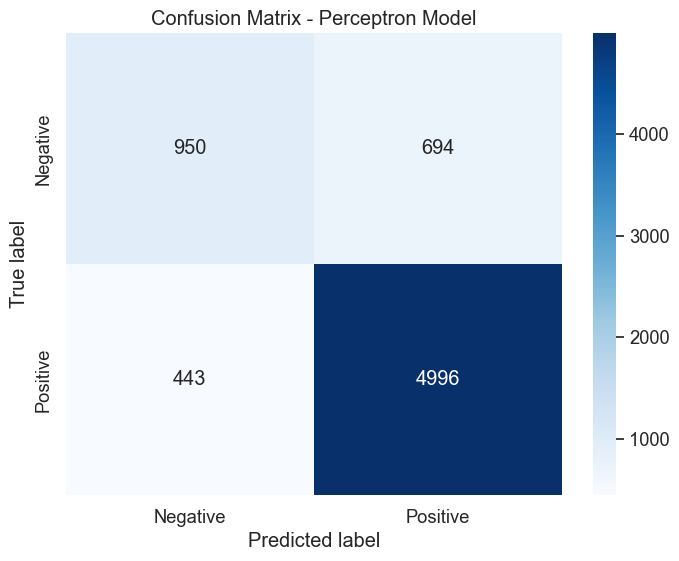

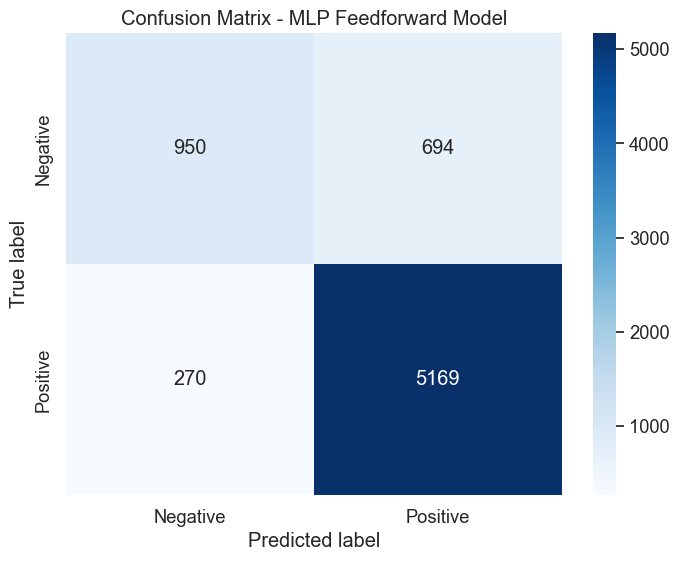

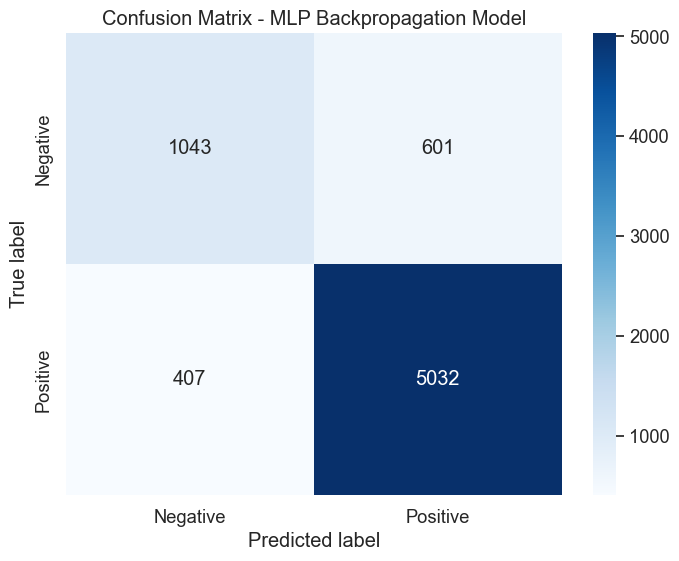

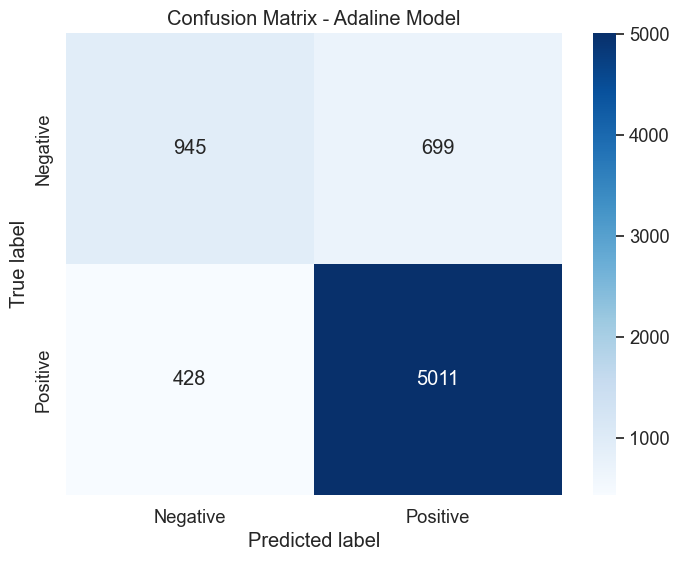

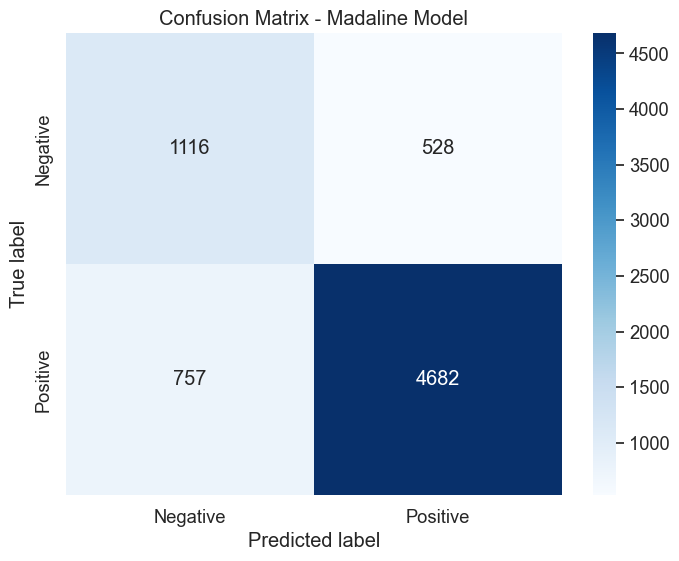

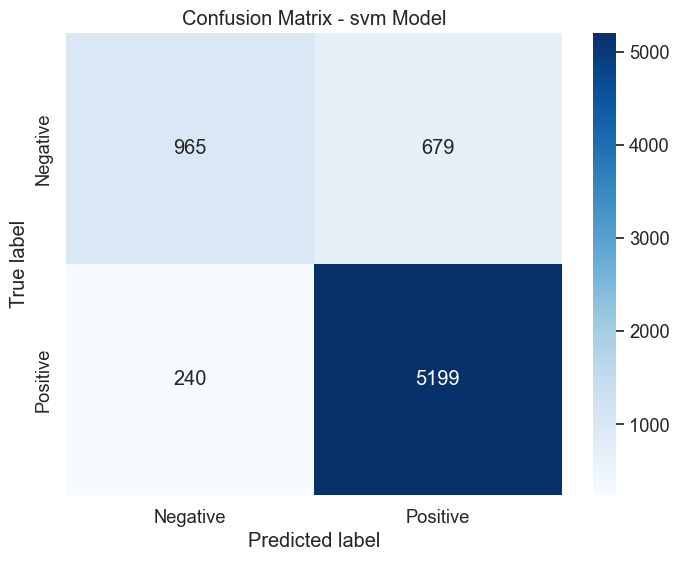

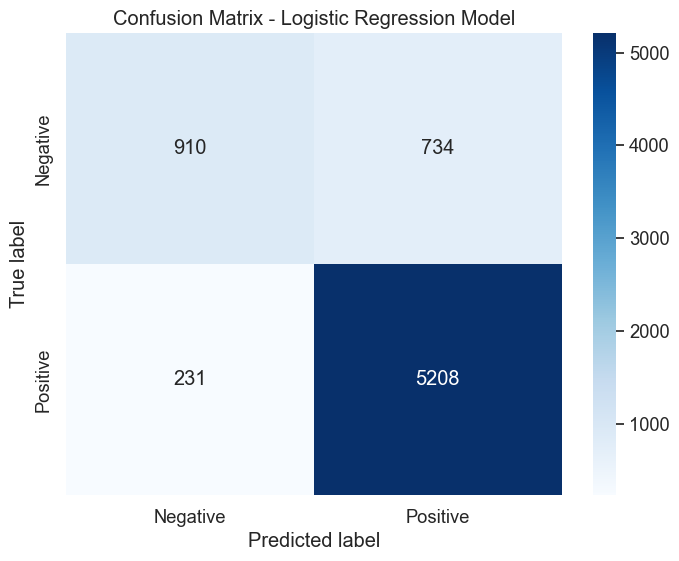

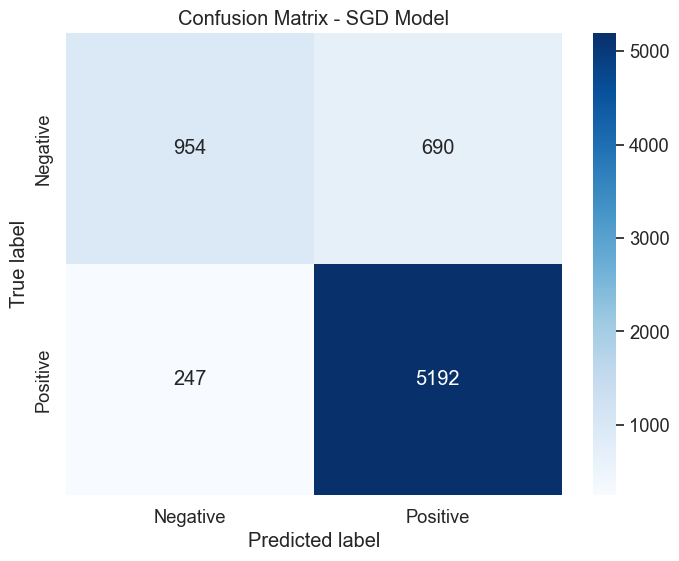

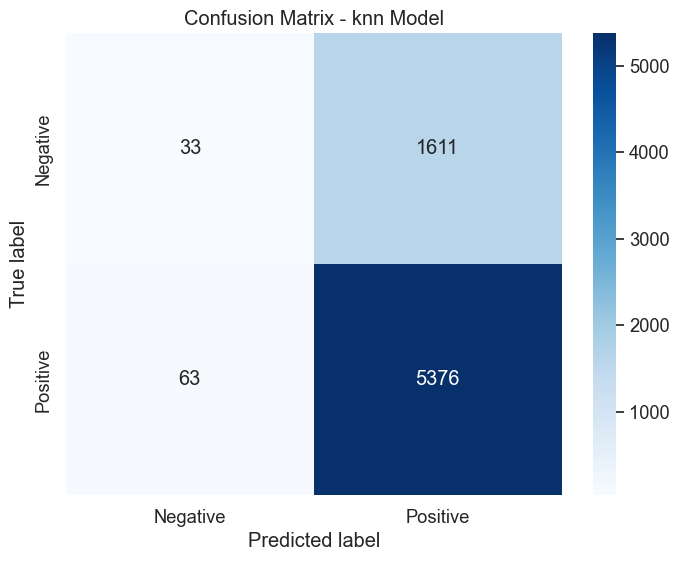

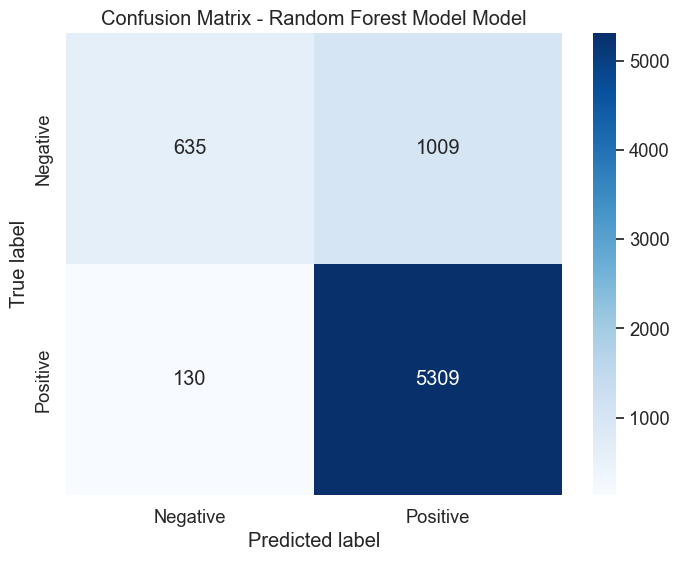

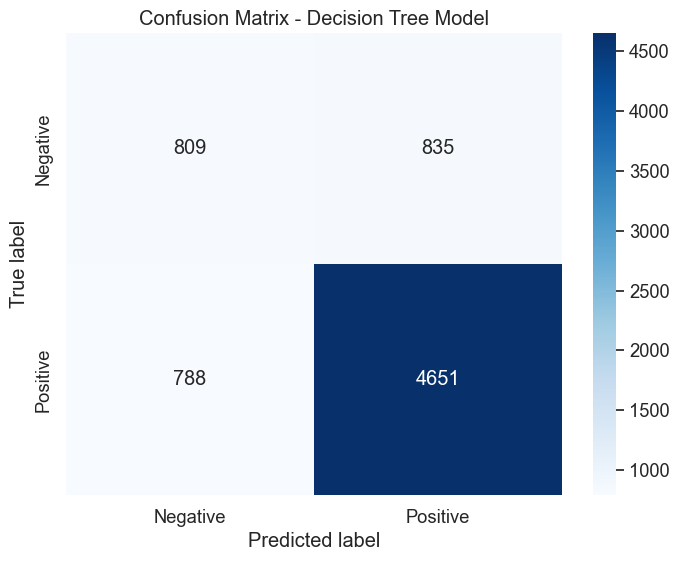

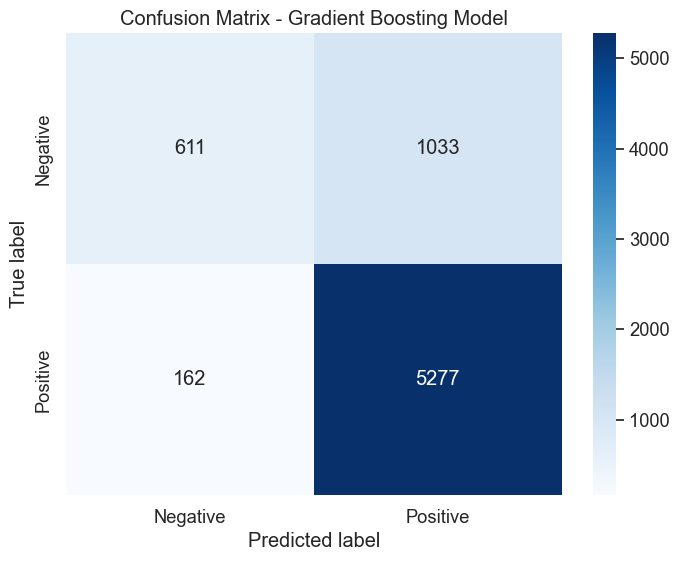

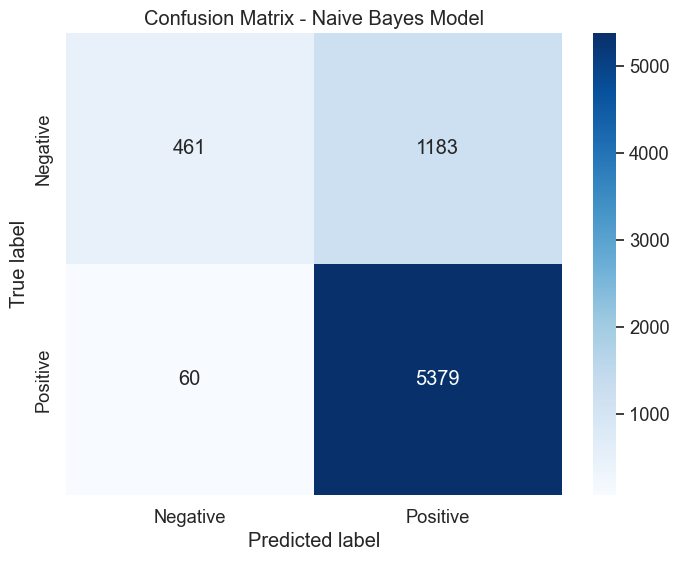

In [ ]:

# Visualize Confusion Matrices
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')


models = ["Perceptron", "MLP Feedforward", "MLP Backpropagation", "Adaline","Madaline","svm","Logistic Regression","SGD","knn","Random Forest Model","Decision Tree","Gradient Boosting","Naive Bayes"]
for i, y_pred in enumerate([ y_pred_perceptron, y_pred_mlp_feedforward, y_pred_mlp_backpropagation, y_pred_adaline,y_pred_madaline,y_pred_svm,y_pred_logistic,y_pred_sgd,y_pred_knn,y_pred_rf,y_pred_dt,y_pred_gb,y_pred_nb]):
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, labels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix - {models[i]} Model")
    plt.show()


In [ ]:
new_reviews = [
    "love it",
    "good quality.",
    "i dont like it",
    "bad quality",
]

# Print the predictions using all models
def print_predictions(model_name, predictions):
    print(f"\nPredictions using {model_name} Model:")
    for review, prediction in zip(new_reviews, predictions):
        sentiment = "Positive" if prediction == 1 else "Negative"
        print("Review:", review)
        print("Predicted Sentiment:", sentiment)
        print()

# Print predictions for each model
print_predictions("Perceptron", y_pred_perceptron)
print_predictions("MLP Feedforward", y_pred_mlp_feedforward)
print_predictions("MLP Backpropagation", y_pred_mlp_backpropagation)
print_predictions("Adaline", y_pred_adaline)
print_predictions("Madaline", y_pred_madaline)
print_predictions("KNN", y_pred_knn)
print_predictions("SVM", y_pred_svm)
print_predictions("Decision Tree", y_pred_dt)
print_predictions("Logistic Regression", y_pred_logistic)
print_predictions("Random Forest", y_pred_rf)
print_predictions("SGDClassifier", y_pred_sgd)
print_predictions("GradientBoostingClassifier", y_pred_gb)
print_predictions("Naive Bayes", y_pred_nb)


Predictions using Perceptron Model:
Review: love it
Predicted Sentiment: Positive

Review: good quality.
Predicted Sentiment: Positive

Review: i dont like it
Predicted Sentiment: Negative

Review: bad quality
Predicted Sentiment: Positive


Predictions using MLP Feedforward Model:
Review: love it
Predicted Sentiment: Positive

Review: good quality.
Predicted Sentiment: Positive

Review: i dont like it
Predicted Sentiment: Negative

Review: bad quality
Predicted Sentiment: Negative


Predictions using MLP Backpropagation Model:
Review: love it
Predicted Sentiment: Positive

Review: good quality.
Predicted Sentiment: Positive

Review: i dont like it
Predicted Sentiment: Negative

Review: bad quality
Predicted Sentiment: Positive


Predictions using Adaline Model:
Review: love it
Predicted Sentiment: Positive

Review: good quality.
Predicted Sentiment: Positive

Review: i dont like it
Predicted Sentiment: Negative

Review: bad quality
Predicted Sentiment: Negative


Predictions using Ma